# Assignment 3

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [39]:
NAME = "Adriel Naranjo"
STUDENT_ID = "1676622"

# 1) Binary Classification
## i) Logistic Regression
In this task, we will run logistic regression using scikit learn. But first the dataset needs to be created. Call this data set the Gaussian Quantile Dataset.

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
np.random.seed(111)

In [77]:
# Construct dataset
X, y = make_gaussian_quantiles(cov=4.,
                                 n_samples=500, n_features=1,
                                 n_classes=2, random_state=1)
# Making X1 values, reshape y1, and creating random noise for x1 values
X = X-3.0  
noise = np.random.normal(loc=0.0, scale=0.4, size=len(X)).reshape(-1,1)
y = y.reshape(-1,1)
X = np.sum([X,noise],axis=0)

In [78]:
# The dataset
print(X)
print(y)
print(np.concatenate((X,y), axis=1, out=None))

[[-2.42338811e+00]
 [ 1.53512714e+00]
 [-2.97599422e+00]
 [ 4.78916909e-01]
 [-1.60960529e+00]
 [-3.55691511e+00]
 [-3.86154330e+00]
 [-3.07094921e+00]
 [ 2.76750500e+00]
 [-2.41581646e+00]
 [-4.62707507e+00]
 [-4.74476399e+00]
 [-3.00505940e+00]
 [ 5.43380441e-01]
 [-5.55712418e+00]
 [-1.41449115e+00]
 [-2.27826391e+00]
 [-1.94740223e+00]
 [-2.46007512e+00]
 [-3.76786255e+00]
 [-7.59123156e-01]
 [-3.92296941e+00]
 [-1.40830029e+00]
 [-3.51714486e+00]
 [-6.91583977e-01]
 [-3.25406548e+00]
 [-4.70192512e+00]
 [-2.88430556e+00]
 [-3.82868876e+00]
 [-3.60400991e-01]
 [-6.66456109e+00]
 [-4.78099987e+00]
 [-1.78596116e+00]
 [-1.41492005e-01]
 [-6.37809602e-01]
 [-2.48720638e+00]
 [ 1.08349034e+00]
 [-2.90674484e+00]
 [-2.37943799e+00]
 [-3.04426113e+00]
 [-1.75114584e+00]
 [-1.31106928e+00]
 [-3.59129260e+00]
 [-3.36051923e+00]
 [-3.97867615e+00]
 [-5.00806191e+00]
 [-2.67797355e+00]
 [-1.17774258e+00]
 [-3.17578094e+00]
 [-8.34086510e+00]
 [-4.69215016e+00]
 [-4.72072708e+00]
 [-2.7908280

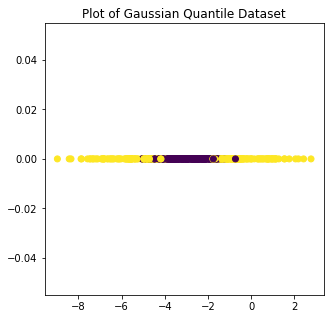

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

# plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset')
plt.show()

Above is a plot of the dataset we created. Yellow dots are class 1 and purple dots are class 0.
### i.a.) Comment on how do you think logistic regression will perform when trying to classify this dataset.

I think it will preform good since the set given is from the gaussian distribution but not good enough to make any inferences about our data. Will most likely classify most of our data but wont be able to completely linearly seperate our data in order to classify accurately. 

### i.b.) Implement Logistic Regression
Implement logistic regression using scikit learn on the dataset we created and train the model. You may refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information on scikit learn logistic regression. \\
** Hint: look up in the documentation how you can adjust the penalty parameter to 'l2' or 'l1' regularization, the parameter C (the same as $\lambda$ in linear regression), or adjusting max_iter.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=144)
clf = LogisticRegression(random_state=144, penalty='l2').fit(x_train, y_train)
print('Training Score: ', clf.score(x_train, y_train))
print('Testing Score: ', clf.score(x_test, y_test))

Training Score:  0.7375
Testing Score:  0.68


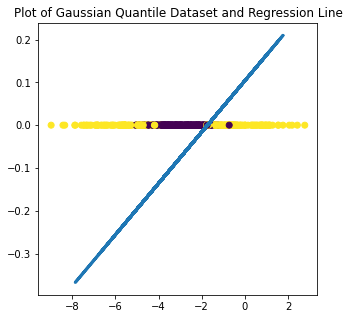

In [46]:
# Plot results
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], np.zeros(len(X)), c=y)

plt.plot(x_test, clf.coef_ * x_test + clf.intercept_, linewidth=3)
plt.title('Plot of Gaussian Quantile Dataset and Regression Line')
plt.show()



### i.c) How did we do?

Please comment on the performance of the model you trained on training and test sets. Did you try adjusting the parameters? If so, did they help?

The model did as I expected, classified most of the points.

My results:

    Training Score:  0.8326359832635983
    Testing Score:  0.85

I uses max_iter=100 and penalty set to 'none' and 'l2' and other values penalty takes but still didnt see a big difference in my results. At most adding these penalties increased the scores by a tenth of a percent. I dont think any of these actually helped much because from my knowledge, normalization and max_iter will just help our line converge but wont make our score significantly change. 

At the end of it I just stuck with 'l2' in my implementation as you can see above in my code. This produced the best scores probably because the penalty controlled the complexity of the logistical regression model. 



## ii) Polynomial Transformation + Sign Classification
Let's try some other models and see if they perform better. Recall from lecture the Binary "Sign" Classifier:
$$\begin{align}
f(x)= sign({\bf{\theta}}\cdot\phi(x))=\begin{cases} 
          1 & 0\leq {\bf{\theta}} \cdot\phi(x)  \\
          0 & {\bf{\theta}} \cdot\phi(x) < 0
            \end{cases}
\end{align}
$$
We will now use Binary Sign Classifier, along with polynomial and horizontal translation in order to learn out dataset. In the next couple of sections we will illustrate how to use polynomial and horizontal translation in order use the Sign Binary Classifier. \\
** Note that we will classify an example as 1 if $0\leq {\bf{\theta}} \cdot\phi(x)$

### Polynomial transformation example
Let us first generate an example dataset.

In [47]:
# Create example data
example_data = np.arange(-3,3,0.1).reshape(-1,1)

# We will create some example labels. y=1 if x<-1 and 1<x and 0 otherwise
example_y = np.array([1 if 1<x or x<-1 else 0 for x in example_data])



From the plot below, we can see that this second data set is much like the dataset in part i.

<function matplotlib.pyplot.show>

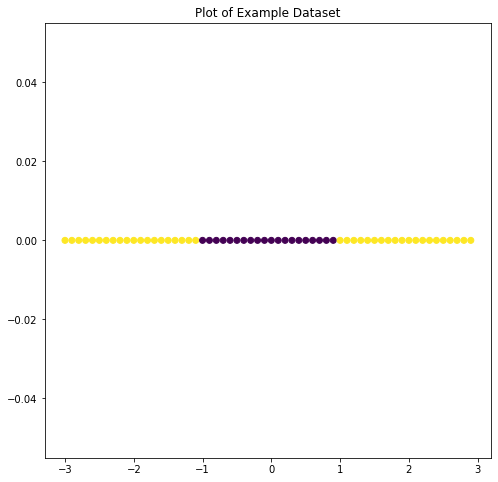

In [48]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1),np.zeros(len(example_data)), c=example_y)
plt.title('Plot of Example Dataset')
plt.show

Next, we'll now begin implementing the polynomial transformation. We begin by using scikit learn to carry polynomial transform on an example dataset. We'll also define the score variable $\hat{y_i}={\bf{\theta}}\cdot\phi(x)$ as:

$$
\begin{align}
\hat{y_i}={\bf{\theta}}\cdot\phi(x_i) &= \theta_{0} + \theta_{1} \phi_1(x_i)+\theta_{2} \phi_2(x_i)+...+\theta_{d} \phi_d(x_i) \\
&=\theta_{0} + \theta_{1} x_i+\theta_{2} x_i^2+...+\theta_{d} x_i^d
\end{align}
$$
where $i$ is the sample number $\phi_j(x)=x^j$, where $j$ is a power, and ${\bf{\theta}}$ is a weight vector that is the length of $d$ (more on ${\bf{\theta}}$ later). To tie it all back together, the $i^{th}$ sample will be labelled as 1 if $0 \leq \hat{y}_i$ and 0 if $0>\hat{y}_i$.

\\

The first step will then be to compute the polynomial transform. Our data is in the form
$$X =
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots \\
    x_{n} 
\end{bmatrix}$$
Using second degree polynomials we transform it into:
$$X =\begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}$$
More information here on scikit learn polynomial transformation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) # We will use a polynomial of 2nd degree for this example.

In [50]:
# Next we fit the polynomial transform on (60,1) example_data
example_X = poly.fit_transform(example_data)


Next, we compute the vector $\hat{y}=\phi(x) {\bf{\theta}}$ by multiplying the matrices $\phi(x)$ and ${\bf{\theta}}$. ${\bf{\theta}}$ is a weight vector that determines the value of the bias and the scale of the polynomial transformations. We will manually adjust these values to try to get a good fit using Binary Sign Classification model. The plus side of using ${\bf{\theta}}$ is that we can drop unwanted terms from prediction $h_i=sign(\hat{y}_i)$. For example we will implement computing the array of scores $\hat{y}$ as
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    0\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2\\
     x_{2}^2\\
    \vdots\\
     x_{n}^2
\end{bmatrix}
\end{align}
$$

In [51]:
# We compute y_hat
theta = np.array([0,0,1])


# example_data(60,1) * theta(3,) = y_hat(60,)
y_hat = np.matmul(example_X,theta)



Now we'll plot our data 

<function matplotlib.pyplot.show>

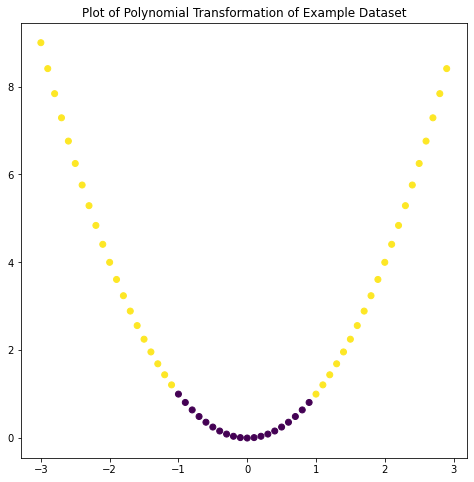

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
plt.title('Plot of Polynomial Transformation of Example Dataset')
plt.show

We can see that if we simply move this new curve down, we classify most of the examples correctly using the Binary Sign classifier. We'll do so by adjusting ${\bf{\theta}}$ so that the second degree polynomial term is moved down slightly by calculating:
$$
\begin{align}
\hat{y}=\phi(x) {\bf{\theta}}= \begin{bmatrix}
    1&x_{1} & x_{1}^2\\
    1&x_{2}& x_{2}^2\\
    \vdots & \vdots & \vdots \\
    1&x_{n}& x_{n}^2
\end{bmatrix}
\begin{bmatrix}
    -0.9\\
    0\\
    1
\end{bmatrix}=\begin{bmatrix}
     x_{1}^2-0.9\\
     x_{2}^2-0.9\\
    \vdots\\
     x_{n}^2
-0.9\end{bmatrix}
\end{align}
$$

<function matplotlib.pyplot.show>

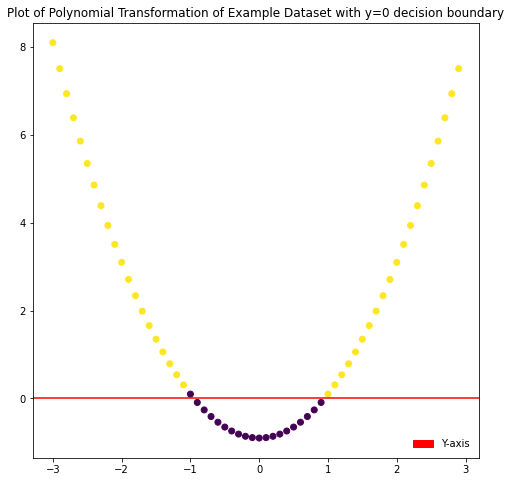

In [53]:
# Change the weight value
theta = np.array([-0.9,0,1])

# Compute y_hat
y_hat = np.matmul(example_X,theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial Transformation of Example Dataset with y=0 decision boundary')
plt.show

We can now see that if we were to classify the datapoints by the sign of $y_i$ that most of the data points would be correctly classified as those below the y-axis would be classified as 0 while the rest would be classified as 1.

### Second transformation example:
In addition to implementing a polynomial transformation and moving it up or down, we can also move the transformation right or left using a simple yet tricky transformation. Recall that a function $f(x)$ can be moved right $q$ units by computing $f(x-q)$ or to the left by $q$ computing $f(x+q)$. We can also move the polynomial transform left or right in a similar fashion by letting $\phi_j(x)=(x-q)^j$. Now we want to implement a right transform by choosing $q = 2$, carrying out a polynomial transforms, and shifting polynomial transforms down by 0.9. So to begin, we first want to transform the example_dataset into:

$$X =\begin{bmatrix}
    1&(x_{1}-2) & (x_{1}-2)^2\\
    1&(x_{2}-2)& (x_{2}-2)^2\\
    \vdots & \vdots & \vdots \\
    1&(x_{n}-2)& (x_{n}-2)^2
\end{bmatrix}$$
This should move our transformed value over to the right 2 units.

<function matplotlib.pyplot.show>

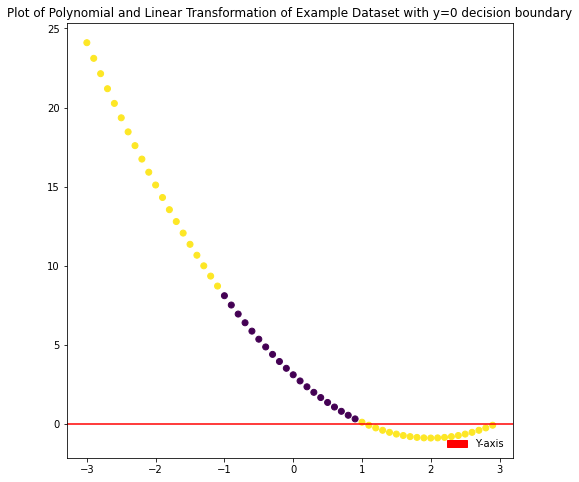

In [54]:
# First subtract 2 from each row in example_data
example_X = example_data-2

# Compute the 2nd degree polynomial transform
example_X = poly.fit_transform(example_X)

# Compute new y_hat with same theta as before
theta = np.array([-0.9,0,1])
y_hat = np.matmul(example_X,theta)

# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(np.arange(-3,3,0.1).reshape(-1,1) ,y_hat, c=example_y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.legend([arr1, arr2], ['u','v'])
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Polynomial and Linear Transformation of Example Dataset with y=0 decision boundary')
plt.show

You can see that the parabola now begins at 2, rather than zero, and is shifted down.

## Binary Sign Classification on dataset from part (i)

### ii.a) How do you think a sign classification plus transformation model will perform on the Gaussian Quantile data?

I think it will do a better job than the Logistic Regression did in the previous example. Probably will given an accuracy better than 70% because binary sign classification does a good job (for the most part) at seperating data into different classes. 

### ii.b) Implementation
Now, you will implement a Binary Sign Classification model to transform the linear data from part (i) as well as implement the helper functions to compute $\hat{y}$, the class prediction, and the model accuracy. Then you will use the methods outlined above to transform the data into a new form for classification. For this example, we will just run our model on all of the data x and y.

In [55]:
# Implement these helper functions

# We will end up passing our y_hat into this
def generate_h(y):
    """
    Generates the class prediction h[i]=1 if y[i]>0 or h[i]=0 if y[i]<0
    args:
        y: a numpy array of y values
    return: a (500,1) array of 1 and 0s indicating class prediction
    """
    h = np.array([1 if 1<x or x<-1 else 0 for x in y])
    
    return h

def compute_accuracy(y, h): 
    """
    computes the accuracy of the model. (h-y)/len(y)
    args:
        y: true class label
        h: predicted labels
    return: the accuracy.
    """
    count = 0
    len_of_y = len(y)

    for i in range(0, len_of_y):
      if y[i] == h[i]:
        count = count + 1 
      else: continue
    
    return (count / len_of_y)


In [56]:
# Impelement your data transformation using scikit learn polynomial
polynomial_degree = 2
q = 3
poly = PolynomialFeatures(polynomial_degree)
X_tf = X.reshape(-1,1) # Don't change
X_tf = poly.fit_transform(X_tf+q) # -q goes right +q goes left

In [57]:
# Compute y_hat

# trial 1 
# w = [0.90,0,0,0,0,0,1]

# trial 2
w = [-0.75,0,1]

theta = np.array(w) #ADJUST THESE WEIGHTS. The length of w needs to be the same as the degree of polynomial+1,
# Either delete a poly-term or scale it, shift the transformed values +up or -down

y_hat = np.matmul(X_tf ,w) # Compute y_hat's

# Run sign model
h = generate_h(y_hat)
accuracy = compute_accuracy(y,h)
print(f"accuracy= {accuracy}%")

accuracy= 0.904%


### Plotting data against y=0
The plotting function below may be helpful for visualizing the data against the decision boundary.

<function matplotlib.pyplot.show>

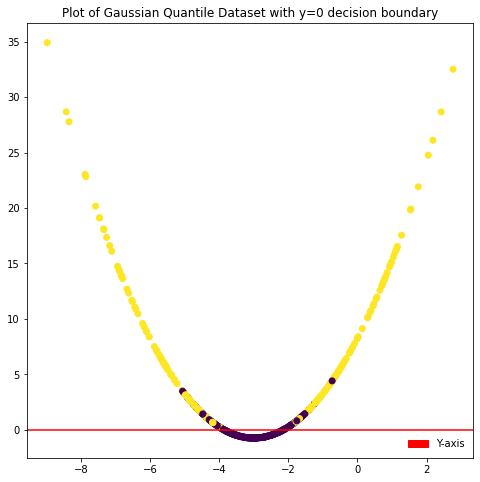

In [58]:
# Plot
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
arr1 = plt.scatter(X ,y_hat, c=y)
y_lim = plt.ylim()
x_lim = plt.xlim()
arr2 = plt.plot(x_lim, (0,0), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
red_patch = mpatches.Patch(color='red', label='Y-axis',linestyle ='-')
plt.legend(handles=[red_patch],loc='lower right', frameon=False)
plt.title('Plot of Gaussian Quantile Dataset with y=0 decision boundary')
plt.show

### ii.c) How did we do?

Please comment on the performance of the model you created on classifying the dataset. What transformation parameters did you use? What was your ${\bf{\theta}}$?

First Trial:

      polynomial_degree = 6
      w = theta = [0.90,0,0,0,0,0,1]
      q = 0
      accuracy= 0.42%



Second Trial: 

      polynomial_degree = 2
      w = theta = [-0.75,0,1]
      q = 3
      accuracy= 0.904%


So in the first trial I was trying to make the curve steeper by making the polynomial degree 6. I randomly chose weights and played around with them to see if I could increase my accuracy. I also kept q to be 0 so I could see where on the x axis my parabola would start at. After playing around a bunch I realized how I needed to adjust the parameter and the theta values. 


I realized my curve was actually too tight to where all the data points were grouped very clustered together. I also realized that I needed to move my data to the left so I change q=3. Additionally with my theta, I notice I would probably get more accuracy if I lowered the points so I set one of the weights to -0.75.

As you can see below, the accurancy I obtained after analyzing and adjusting parameters & theta is 0.904% which to me is pretty good! 




##iii) Artificial Neural Network
Next, we will use tensorflow to create an artificial neural network to classify the Gaussian Quantile dataset.

### iii.a) Build a Neural Network to feed in the Gaussian Quantile data

Below, define a neural network with the following layers:
<ul>
<li>Input Layer</li>
<li>Dense Layer with 15 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 5 neurons, choose whatever activation you think is suitable</li>
<li>Dense Layer with 1 neuron, choose whatever activation you think is suitable</li>
<li> Dense layer with 1 neuron for classification (what activation do we need to use?)</li>
</ul>

Then, run model.summary(), compile, then fit the model

In [59]:
from tensorflow.keras.layers import Input, Dense # Only use these layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import * 

def build_model():
  model = Sequential() 
  model.add(Dense(units=15, input_dim=1, activation='tanh'))
  model.add(Dense(units=5, activation='tanh'))
  model.add(Dense(units=1, activation='tanh'))
  model.add(Dense(units=1, activation='sigmoid'))
  return model

In [60]:
# Show a summary of your model
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam()
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [62]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 0s 23ms/step - loss: 0.8269 - accuracy: 0.4225 - val_loss: 0.7765 - val_accuracy: 0.4400
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.4200 - val_loss: 0.7411 - val_accuracy: 0.4400
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.3225 - val_loss: 0.7210 - val_accuracy: 0.3700
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.4925 - val_loss: 0.7108 - val_accuracy: 0.4500
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5575 - val_loss: 0.7028 - val_accuracy: 0.5600
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6000 - val_loss: 0.6938 - val_accuracy: 0.6000
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6300 - val_loss: 0.6869 - val_accuracy: 0.6100
Epoch 8/100


In [63]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

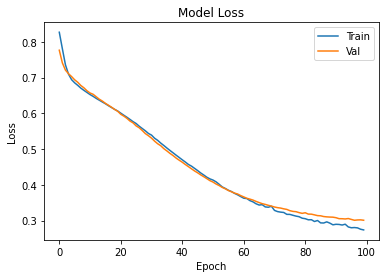

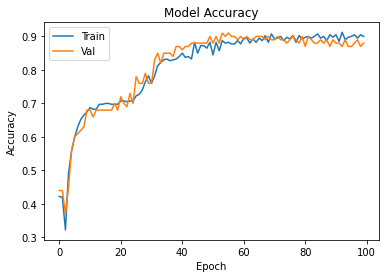

In [64]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

###iii.a) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? Was the model able to outperform Logistic Regression? Outperform Binary Sign Classification? If it did, why do you think your neural network beat these other models? 

Trial 1: 

    With activation functions: tahn tahn sigmoid sigmoid

    Model Loss shape: Decreasing small drop for 10 epocks then very long and smooth descent for the rest of the epochs for both lines. 

    Model Accuracy shape: plateau for 20 epochs then increases and is curved and slightly ridged through while increasing for both lines. 

    13/13 [==============================] - 0s 5ms/step - loss: 0.4943 - accuracy: 0.8925 - val_loss: 0.5109 - val_accuracy: 0.8700


Trial 2: 

    With activation functions: tahn tahn tahn sigmoid
    
    Model Loss shape: smopth decrease in both lines throughout

    Model Accuracy shape: very ridged increase for both lines throughout. Did its increasing mainly within the first 30 epochs then remained ridged while bouncing between 85% and 90% accuracy. 

    13/13 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.8975 - val_loss: 0.3002 - val_accuracy: 0.8800

Trial 3: 

    With activation functions: sigmoid sigmoid sigmoid sigmoid
    
    Model Loss Histogram shape: pretty much an asymetric x^3 polynomial look. very long smooth tail end.

    Model Accuracy shape: very step like throughout. Initial step then a bunch of small step looking lines. 

    13/13 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.7125 - val_loss: 0.6470 - val_accuracy: 0.7200

Trial 4: 

    With activation functions: sigmoid tahn sigmoid sigmoid

    Model Loss shape: smoothly evenly distributed descent. 

    Model Accuracy shape: huge descent ridged dip in the beginning then suprisely gets very smooth. 

    13/13 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.8350 - val_loss: 0.5318 - val_accuracy: 0.8500



CONCLUSION: 

There were a total of 2^4 = 16 different ways we could have played with tanh and sigmoid for the activation functions for this part of the assignment and I ended up choosing the combinations that I thought would get the best results based of my own intuition. 

Trial 2 out of all the trials was the combination that yielded the best result. In the sequential model I built, For this sequence tanh, tanh, tanh, sigmoid was the sequence of activation functions. I decided to do it this way because 1) I felt this combination would do well because the final result is the sigmoid function which is a good way to map scalars to a probability between (0,1) and 2) I seen it done this way in the class example and gave it a whirl. 

The percent accuracy this model produced was between in the range of 89% to 91% when running it over and over again which I felt was good along with the val_accuracy in the range of 88% to 89%. 


I believe this model beat the other models because the first three activation functions are hyperbolic tangent which has a property that "approximates identity near the origin" which further allows the network learn efficiently. This probably explains why the graph of the loss function is smooth and the accuracy graph is very ridge because after each epoch the model is learning well which means the accuracy of our model will be changing quickly. 


I did some extra referencing to make my conclusion, here is my "Cited": 

https://ai.stackexchange.com/questions/113/whats-the-difference-between-hyperbolic-tangent-and-sigmoid-neurons#:~:text=Hyperbolic%20tangent%20has%20a%20property,(0)%3D0.25).

#2) Neural Network Classification
Next, we move on to using an artificial Neural Network for a task that is a bit harder. We will see if we can train our model to determine if patients with suffering from heart disease died during follow up treatment. The dataset has 299 samples with 12 features each and a target class:
<ul>
<li>age: age of the patient (years)</li>
<li>anaemia: decrease of red blood cells or hemoglobin (boolean)</li>
<li>high blood pressure: if the patient has hypertension (boolean)</li>
<li>creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)</li>
<li> diabetes: if the patient has diabetes (boolean)</li>
<li> ejection fraction: percentage of blood leaving the heart at each contraction (percentage)</li>
<li> platelets: platelets in the blood (kiloplatelets/mL)</li>
<li> sex: woman or man (binary)</li>
<li> serum creatinine: level of serum creatinine in the blood (mg/dL)</li>
<li> serum sodium: level of serum sodium in the blood (mEq/L)</li>
<li> smoking: if the patient smokes or not (boolean)</li>
<li> time: follow-up period (days)</li>
<li> [target] death event: if the patient deceased during the follow-up period (boolean)</li>
</ul>

In [65]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2020-08-23 20:44:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv.1’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0s      

2020-08-23 20:44:53 (97.1 MB/s) - ‘heart_failure_clinical_records_dataset.csv.1’ saved [12239/12239]



## Data Loading and Preprocessing


In [66]:
# Read in the data
nn_dataframe = pd.read_csv('heart_failure_clinical_records_dataset.csv',sep=',')
nn_dataframe.dropna(inplace=True)


In [67]:
# Check data
nn_dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Split Data into X and y. Then scale the X data for model training

In [68]:
X = nn_dataframe.iloc[:, 0:12]
y = nn_dataframe.iloc[:,12]

print(X)
print(y)

      age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0    75.0        0                       582  ...    1        0     4
1    55.0        0                      7861  ...    1        0     6
2    65.0        0                       146  ...    1        1     7
3    50.0        1                       111  ...    1        0     7
4    65.0        1                       160  ...    0        0     8
..    ...      ...                       ...  ...  ...      ...   ...
294  62.0        0                        61  ...    1        1   270
295  55.0        0                      1820  ...    0        0   271
296  45.0        0                      2060  ...    0        0   278
297  45.0        0                      2413  ...    1        1   280
298  50.0        0                       196  ...    1        1   285

[299 rows x 12 columns]
0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtyp

In [69]:
# Check X data
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


###2.a) Use MinMaxScaler() to preprocess the dataset.
This is similar to standardization but will transform all the feature values to between 0 and 1. \\
**Hint: read information on MinMaxScaler (and other preprocessing transforms here):https://scikit-learn.org/stable/modules/preprocessing.html#normalization

In [70]:
from sklearn import preprocessing

X = X.values # Returns a numpy array  
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Create numpy array of labels
y = y.values



###2.b) Implement an Artificial Neural network
Make a neural network to your liking. Define the input layer. Add Layers, specify the number of neurons in each layer, and the activation. and define the out layer.

In [71]:
# BUILD NETWORK HERE
def build_model2():
  model = Sequential() 
  model.add(Dense(units=299, input_dim=(12), activation='tanh'))
  model.add(Dense(units=299, activation='tanh'))
  model.add(Dense(units=299, activation='tanh'))
  model.add(Dense(units=299, activation='tanh'))
  model.add(Dense(units=1, activation='sigmoid'))
  return model

In [72]:
# Show a summary of your model
model = build_model2()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 299)               3887      
_________________________________________________________________
dense_14 (Dense)             (None, 299)               89700     
_________________________________________________________________
dense_15 (Dense)             (None, 299)               89700     
_________________________________________________________________
dense_16 (Dense)             (None, 299)               89700     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 300       
Total params: 273,287
Trainable params: 273,287
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compile your model with the chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam()
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

Epoch 1/250
8/8 [==============================] - 0s 20ms/step - loss: 0.6520 - accuracy: 0.6109 - val_loss: 0.1797 - val_accuracy: 0.9500
Epoch 2/250
8/8 [==============================] - 0s 7ms/step - loss: 0.5369 - accuracy: 0.7238 - val_loss: 0.1943 - val_accuracy: 0.9500
Epoch 3/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4828 - accuracy: 0.7866 - val_loss: 0.1920 - val_accuracy: 0.9500
Epoch 4/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4617 - accuracy: 0.7950 - val_loss: 0.1716 - val_accuracy: 0.9500
Epoch 5/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.7908 - val_loss: 0.1554 - val_accuracy: 0.9500
Epoch 6/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.8117 - val_loss: 0.1688 - val_accuracy: 0.9500
Epoch 7/250
8/8 [==============================] - 0s 6ms/step - loss: 0.4555 - accuracy: 0.7908 - val_loss: 0.1685 - val_accuracy: 0.9500
Epoch 8/250
8/8 [=========

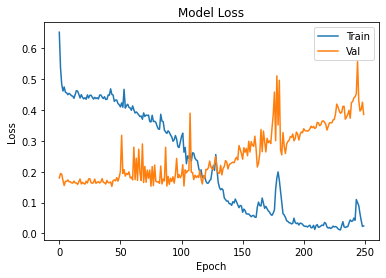

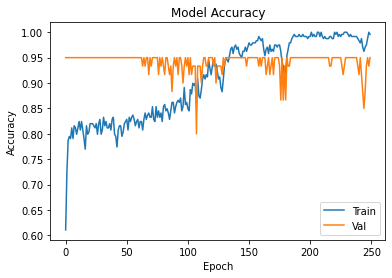

In [74]:
# Call fit on your model passing in the X, y data above, train for 100 epochs
hist = model.fit(X, y, epochs=250, validation_split=0.2)


def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()


# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

###2.c) How did the model perform.
How did your neural network preform? What hyperparameters and optimizer did you choose? What activation did you use?

Trial 1: 

    With 2 dense layers and activation functions: tanh sigmoid

    8/8 [==============================] - 0s 6ms/step - loss: 0.4225 - accuracy: 0.8368 - val_loss: 0.1611 - val_accuracy: 0.9500


Trial 2: 

    With 5 dense layers and activation functions: tanh tanh tanh tanh sigmoid

    8/8 [==============================] - 0s 9ms/step - loss: 0.1794 - accuracy: 0.9372 - val_loss: 0.1494 - val_accuracy: 0.9333


Trial: 3

    With 6 dense layers and activation functions: tanh tanh tanh tanh tanh sigmoid

    8/8 [==============================] - 0s 10ms/step - loss: 0.2286 - accuracy: 0.8954 - val_loss: 0.1470 - val_accuracy: 0.9500

Trial: 4 

    With 4 dense layers and activation functions: tanh tanh tanh sigmoid

    8/8 [==============================] - 0s 8ms/step - loss: 0.4064 - accuracy: 0.8201 - val_loss: 0.1691 - val_accuracy: 0.9500



CONCLUSION: 

After doing 4 trials of tweaking parameters, all my trials preformed well but the one that did the best was trial 2. Trail 2 preformed the best in my opinion because it had the lowest loss out of all the trials. Meaning this model was making better predictions than the rest of the trials. Additionally, I believe this model beat the other models because the first three activation functions are hyperbolic tangent which has a property that "approximates identity near the origin" which further allows the network learn efficiently. I also noticed that the number of layers really can effect the results of the model. Too little layers and the data isnt computed on enough, too many layers and then the model becomes too complicated and the results begin to have too high variance between computations. So 5 layers worked out perfectly. 


The use of the bce loss function also helps out our classification being that binary cross entropy loss is known for minimizing the distance between two probability distributions and does so independently for each class. The adam optimizer is an algorithm that helped with updating the weights throughoutthe network so that the network consistently and concisely updates weights in a gradient-decent fashion. 

After running this all a couple times I realized that I could change epochs to get a better estimation. After some tweaking I decided that 250 would be able to capture some results of my neural net. 

I took median and the mean of the following: 





In [75]:
value_accuracy_median = np.median(np.sort(hist.history['val_accuracy']))
value_accuracy_average = np.average(hist.history['val_accuracy'])

accuracy_median = np.median(np.sort(hist.history['accuracy']))
accuracy_average = np.average(hist.history['accuracy'])



print("Value Accuracy Median: ", round(value_accuracy_median, 4))
print("Value Accuracy Mean: ", round(value_accuracy_average, 4))
print()
print("Accuracy Median: ", round(accuracy_median, 4))
print("Accuracy Mean: ", round(accuracy_average, 4))











Value Accuracy Median:  0.95
Value Accuracy Mean:  0.9419

Accuracy Median:  0.9247
Accuracy Mean:  0.9072
